In [32]:
# Importing Necessary Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

In [33]:
#Reading the Data
dataset = pd.read_csv('C:\\Users\\Parul\\Desktop\\DATASETS\\student.csv')
print(dataset.shape)
dataset.head()

(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [34]:
math = dataset['Math'].values
read = dataset['Reading'].values
write = dataset['Writing'].values

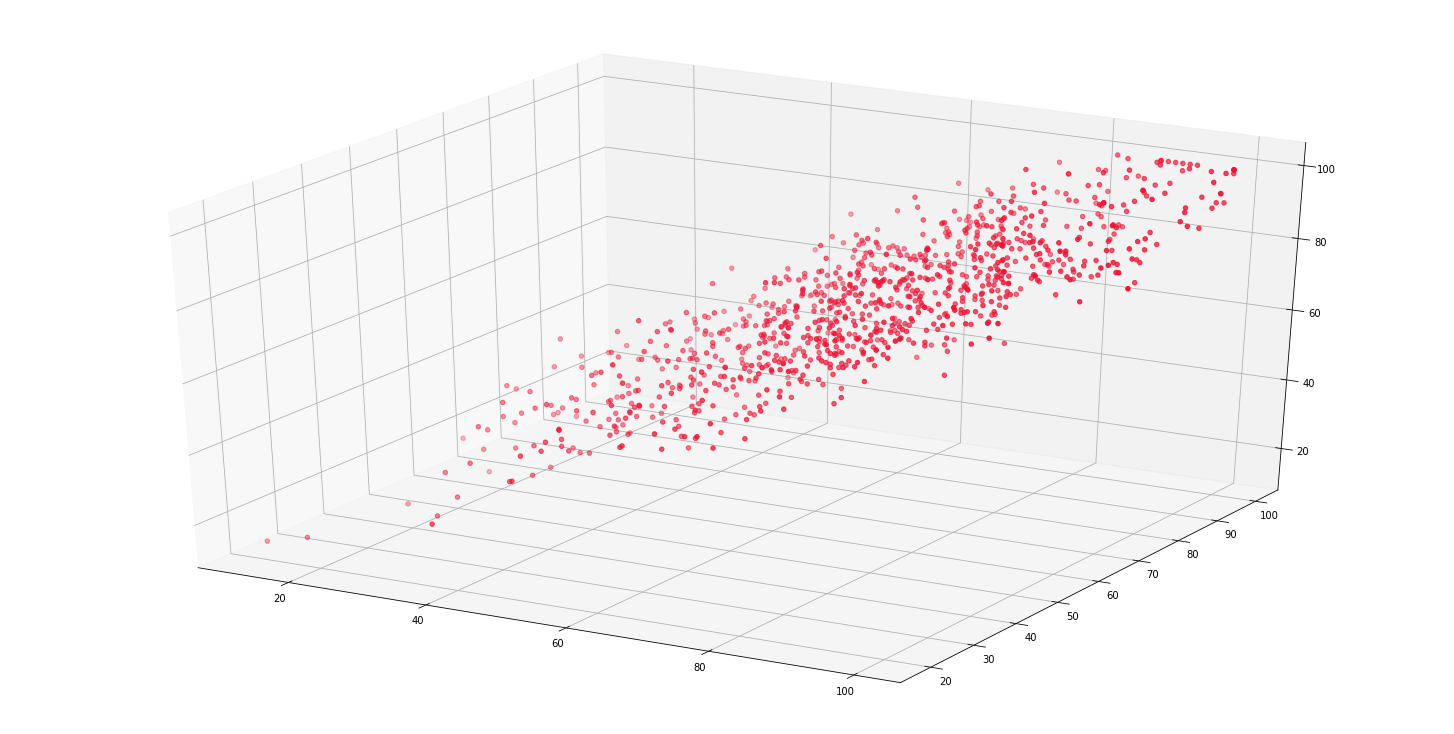

In [35]:
#Plotting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='#ef1234')
plt.show()

Now we will generate our X, Y and B

In [36]:
m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T

# Initial Coefficients
B = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001 # rate of learning

In [37]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2*m)
    return J

In [38]:
initial_cost = cost_function(X, Y, B)
print(initial_cost)

2470.11


### From the above we see that the initital cost is huge so now we will use Gradient descent algorithm to check how much we can reduce 

In [39]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss)/m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

### Now we will compute final value of B

In [40]:
# 100000 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

In [41]:
# New Values of B
print(newB)

[-0.47889172  0.09137252  0.90144884]


In [42]:
# Final cost of new B
print(cost_history[-1])

10.475123473539167


In [43]:
# Model Evaluation - RMSE
def rmse (Y, y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

In [44]:
# Model Evaluation - R2 score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

4.577143972727789
0.9097223273061553


# USING MACHINE LEARNING

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [46]:
# X and Y values
X = np.array([math, read]).T
Y = np.array(write)

In [47]:
# Model Initialisation
reg = LinearRegression()


In [48]:
# Data Fitting
reg = reg.fit(X, Y)

In [49]:
# Y Prediction
Y_pred = reg.predict(X)

In [50]:
# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

In [51]:
print(rmse)
print(r2)

4.572887051836439
0.9098901726717316


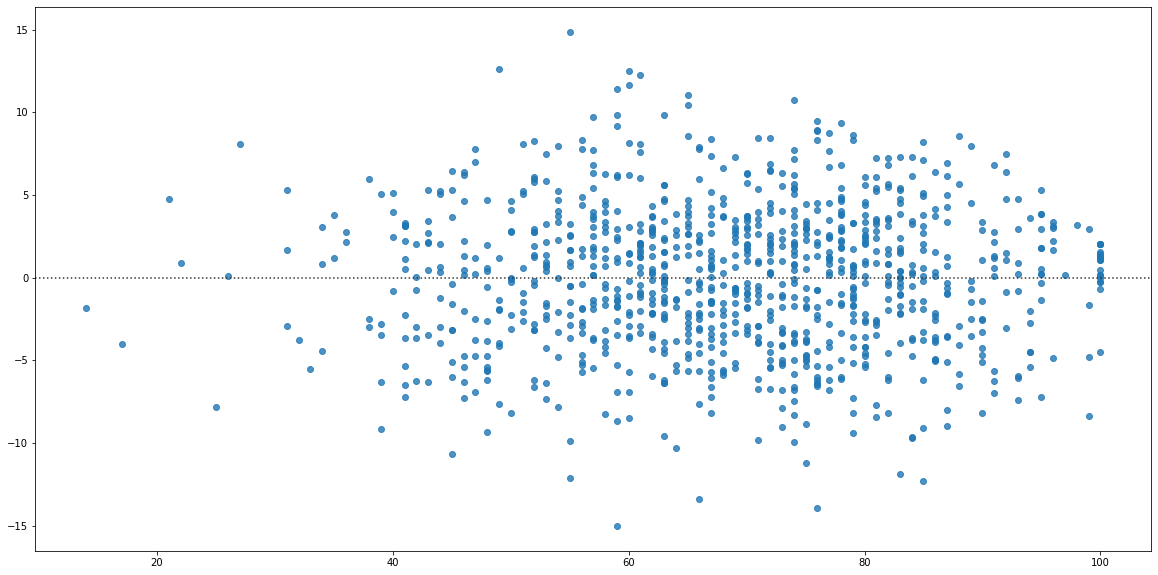

In [52]:
# Examining residuals/error/residual plot
import seaborn as sb
import numpy as np
sb.residplot(Y, Y_pred)

In [53]:
# To check muilti collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

data = pd.read_csv('C:\\Users\\Parul\\Desktop\\DATASETS\\student.csv')

In [54]:
df = pd.DataFrame(data)
x = add_constant(df)

C:\Users\Parul\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [55]:
pd.Series([variance_inflation_factor(x.values, i)
          for i in range(x.shape[1])],
         index=x.columns)

const      24.937662
Math        2.960544
Reading    11.368520
Writing    11.097569
dtype: float64

Having high value from the above we need to drop that

In [ ]:
REGRESSION RESULTS

In [57]:
import statsmodels.api as sm
regressor_OLS = sm.OLS(endog = Y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.169e+05
Date:                Tue, 19 Nov 2019   Prob (F-statistic):                        0.00
Time:                        19:15:13   Log-Likelihood:                         -2941.1
No. Observations:                1000   AIC:                                      5886.
Df Residuals:                     998   BIC:                                      5896.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0891      0.016      5.601      0.000       0.058       0.120
x2             0.8970      0.015     58.370      0.000       0.867       0.927
==============================================================================
Omnibus:                        0.601   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.740   Jarque-Bera (JB):                0.474
Skew:                          -0.011   Prob(JB):                        0.789
Kurtosis:                       3.104   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""